In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
reservas = pd.read_csv("Data/hotel_bookings_clean.csv")
meteo_algarve = pd.read_csv("Data/meteo_algarve_clean.csv")
meteo_lisboa = pd.read_csv("Data/meteo_lisboa_clean.csv")
reservas['arrival_date'] = pd.to_datetime(reservas['arrival_date'])
reservas['reservation_status_date'] = pd.to_datetime(reservas['reservation_status_date'])
reservas['children'] = reservas['children'].astype(int)

In [3]:
mucha_antelacion = reservas[((reservas["is_canceled"] == 1) &
                             (reservas['arrival_date'] - reservas['reservation_status_date'] > pd.Timedelta(days=15)) |
                             ((reservas["is_canceled"] == 0) &
                              (reservas['lead_time'] > 15)))]
poca_antelacion = reservas[((reservas["is_canceled"] == 1) &
                            (reservas['arrival_date'] - reservas['reservation_status_date'] <= pd.Timedelta(days=15)) |
                            ((reservas["is_canceled"] == 0) &
                             (reservas['lead_time'] <= 15)))]
print(f'shape de mucha_antelacion: {mucha_antelacion.shape}\nshape de poca antelacion: {poca_antelacion.shape}')

shape de mucha_antelacion: (85073, 22)
shape de poca antelacion: (33825, 22)


In [4]:
mucha_antelacion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85073 entries, 0 to 118897
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           85073 non-null  object        
 1   is_canceled                     85073 non-null  int64         
 2   lead_time                       85073 non-null  int64         
 3   stays_in_weekend_nights         85073 non-null  int64         
 4   stays_in_week_nights            85073 non-null  int64         
 5   adults                          85073 non-null  int64         
 6   children                        85073 non-null  int32         
 7   babies                          85073 non-null  int64         
 8   meal                            85073 non-null  object        
 9   country                         85073 non-null  object        
 10  market_segment                  85073 non-null  object        
 11  d

In [5]:
mucha_antelacion.groupby('hotel')['is_canceled'].count()

hotel
City Hotel      58447
Resort Hotel    26626
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Posibles cancelaciones con \nantelacion menor a 15 dias')

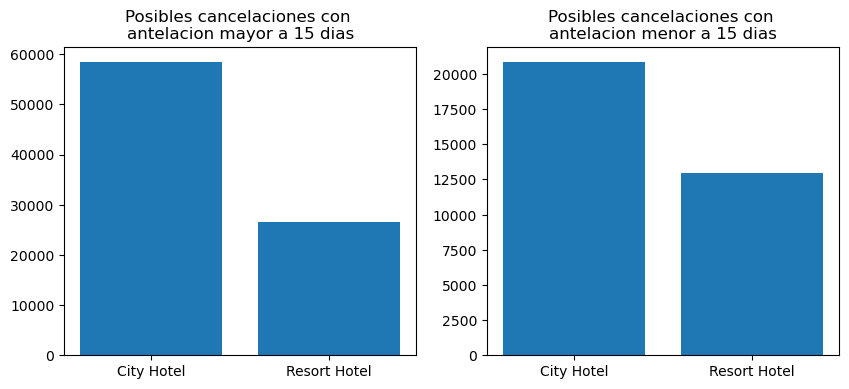

In [6]:
hoteles = ['City Hotel', 'Resort Hotel']
data1 = mucha_antelacion.groupby('hotel')['is_canceled'].count()
data2 = poca_antelacion.groupby('hotel')['is_canceled'].count()
fig, ax = plt.subplots(1,2, figsize = (10,4))
ax[0].bar(hoteles, data1)
ax[0].set_title("Posibles cancelaciones con \nantelacion mayor a 15 dias")
ax[1].bar(hoteles, data2)
ax[1].set_title("Posibles cancelaciones con \nantelacion menor a 15 dias")

Text(0.5, 1.0, 'Cancelacion vs no cancelacion en Algarve en posibles \ncancelaciones con menos de 15 dias de antelacion')

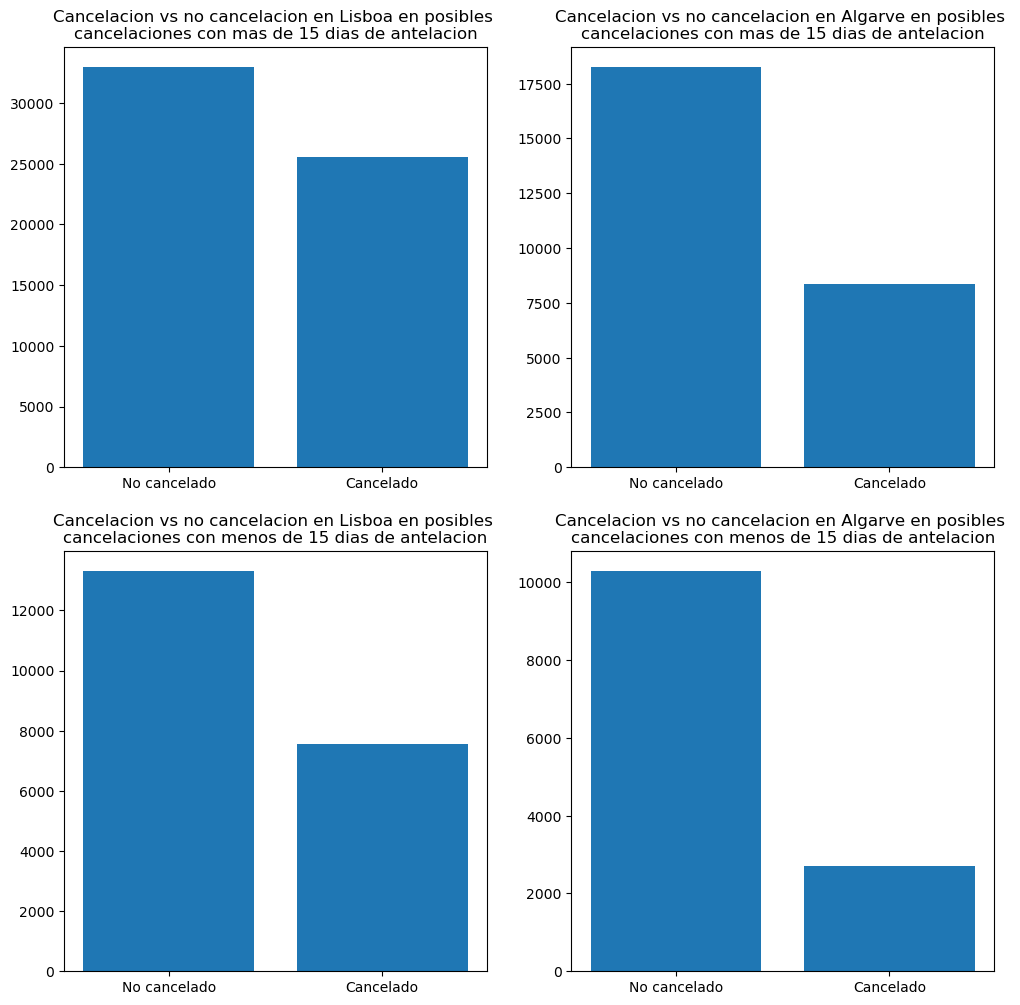

In [125]:
estado = ['No cancelado','Cancelado']
data1 = mucha_antelacion[mucha_antelacion['hotel'] == 'City Hotel'].groupby('is_canceled')['is_canceled'].count()
titulo1 = 'Cancelacion vs no cancelacion en Lisboa en posibles \ncancelaciones con mas de 15 dias de antelacion'
data2 = mucha_antelacion[mucha_antelacion['hotel'] == 'Resort Hotel'].groupby('is_canceled')['is_canceled'].count()
titulo2 = 'Cancelacion vs no cancelacion en Algarve en posibles \ncancelaciones con mas de 15 dias de antelacion'
data3 = poca_antelacion[poca_antelacion['hotel'] == 'City Hotel'].groupby('is_canceled')['is_canceled'].count()
titulo3 = 'Cancelacion vs no cancelacion en Lisboa en posibles \ncancelaciones con menos de 15 dias de antelacion'
data4 = poca_antelacion[poca_antelacion['hotel'] == 'Resort Hotel'].groupby('is_canceled')['is_canceled'].count()
titulo4 = 'Cancelacion vs no cancelacion en Algarve en posibles \ncancelaciones con menos de 15 dias de antelacion'

fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].bar(estado, data1)
ax[0,0].set_title(titulo1)
ax[0,1].bar(estado, data2)
ax[0,1].set_title(titulo2)
ax[1,0].bar(estado, data3)
ax[1,0].set_title(titulo3)
ax[1,1].bar(estado, data4)
ax[1,1].set_title(titulo4)


## Merge

In [8]:
meteo_algarve.rename(columns={'datetime': 'arrival_date'},inplace=True)
meteo_lisboa.rename(columns={'datetime': 'arrival_date'},inplace=True)
meteo_complete = pd.merge(meteo_algarve,meteo_lisboa, how="outer")
meteo_complete["arrival_date"] = pd.to_datetime(meteo_complete["arrival_date"])
meteo_complete

,hotel,arrival_date,tempmax,tempmin,temp,precip,precipprob,windgust,windspeed,conditions,cloudcover
0,Resort Hotel,2015-07-01,24.8,17.2,21.2,0.00,0,54.0,38.3,Partially cloudy,35.6
1,Resort Hotel,2015-07-02,27.6,17.9,23.0,0.00,0,39.6,25.6,Clear,3.1
2,Resort Hotel,2015-07-03,26.9,19.0,23.7,0.00,0,32.4,24.6,Clear,0.0
3,Resort Hotel,2015-07-04,29.0,18.9,24.5,0.00,0,28.8,19.3,Clear,11.4
4,Resort Hotel,2015-07-05,29.4,24.8,27.0,0.00,0,25.2,21.0,Clear,12.9
...,...,...,...,...,...,...,...,...,...,...,...
1581,City Hotel,2017-08-27,25.4,18.1,21.3,0.00,0,37.1,28.3,Partially cloudy,32.1
1582,City Hotel,2017-08-28,23.9,17.7,19.8,6.48,100,0.0,17.4,"Rain, Partially cloudy",46.6
1583,City Hotel,2017-08-29,23.6,17.1,20.1,0.85,100,0.0,21.9,"Rain, Partially cloudy",43.0
1584,City Hotel,2017-08-30,26.9,17.5,21.3,0.00,0,0.0,24.1,Partially cloudy,30.2


In [9]:
poca_antelacion_meteo = pd.merge(poca_antelacion, meteo_complete, on=['hotel','arrival_date'], how='left')
poca_antelacion_meteo

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,arrival_date,tempmax,tempmin,temp,precip,precipprob,windgust,windspeed,conditions,cloudcover
0,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,...,2015-07-01,24.8,17.2,21.2,0.00,0,54.0,38.3,Partially cloudy,35.6
1,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,...,2015-07-01,24.8,17.2,21.2,0.00,0,54.0,38.3,Partially cloudy,35.6
2,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,...,2015-07-01,24.8,17.2,21.2,0.00,0,54.0,38.3,Partially cloudy,35.6
3,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,...,2015-07-01,24.8,17.2,21.2,0.00,0,54.0,38.3,Partially cloudy,35.6
4,Resort Hotel,0,0,0,2,2,0,0,BB,PRT,...,2015-07-01,24.8,17.2,21.2,0.00,0,54.0,38.3,Partially cloudy,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33820,City Hotel,0,0,0,3,2,1,0,BB,otros,...,2017-08-29,23.6,17.1,20.1,0.85,100,0.0,21.9,"Rain, Partially cloudy",43.0
33821,City Hotel,0,4,0,3,1,0,0,BB,otros,...,2017-08-30,26.9,17.5,21.3,0.00,0,0.0,24.1,Partially cloudy,30.2
33822,City Hotel,0,4,0,3,2,0,0,No_meal,FRA,...,2017-08-31,28.0,17.6,21.7,0.00,0,46.4,31.1,Partially cloudy,22.0
33823,City Hotel,0,1,0,3,2,0,0,BB,GBR,...,2017-08-31,28.0,17.6,21.7,0.00,0,46.4,31.1,Partially cloudy,22.0


In [10]:
poca_antelacion_meteo.iloc[2]

hotel                                    Resort Hotel
is_canceled                                         0
lead_time                                          14
stays_in_weekend_nights                             0
stays_in_week_nights                                2
adults                                              2
children                                            0
babies                                              0
meal                                               BB
country                                           GBR
market_segment                                  TA/TO
distribution_channel                            TA/TO
is_repeated_guest                                   0
previous_cancellations                              0
previous_bookings_not_canceled                      0
booking_changes                                     0
deposit_type                               No Deposit
days_in_waiting_list                                0
customer_type               

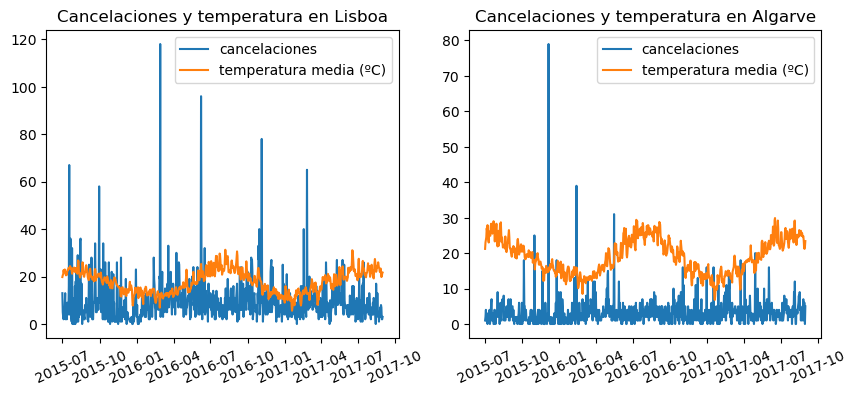

In [147]:
cancels1 = poca_antelacion_meteo[poca_antelacion_meteo['hotel']=='City Hotel'].groupby('arrival_date')['is_canceled'].sum()
cancels2 = poca_antelacion_meteo[poca_antelacion_meteo['hotel']=='Resort Hotel'].groupby('arrival_date')['is_canceled'].sum()
temp1 = poca_antelacion_meteo[poca_antelacion_meteo['hotel']=='City Hotel'].groupby('arrival_date')['temp'].mean()
temp2 = poca_antelacion_meteo[poca_antelacion_meteo['hotel']=='Resort Hotel'].groupby('arrival_date')['temp'].mean()
fig, ax = plt.subplots(1,2, figsize= (10,4))
ax[0].set_title("Cancelaciones y temperatura en Lisboa")
ax[0].plot(cancels1, label="cancelaciones")
ax[0].plot(temp1, label = "temperatura media (ºC)")
ax[0].tick_params(axis='x', rotation=25)
ax[0].legend()
ax[1].set_title("Cancelaciones y temperatura en Algarve")
ax[1].plot(cancels2, label="cancelaciones")
ax[1].plot(temp2, label = "temperatura media (ºC)")
ax[1].legend()
ax[1].tick_params(axis='x', rotation=25)
plt.show()

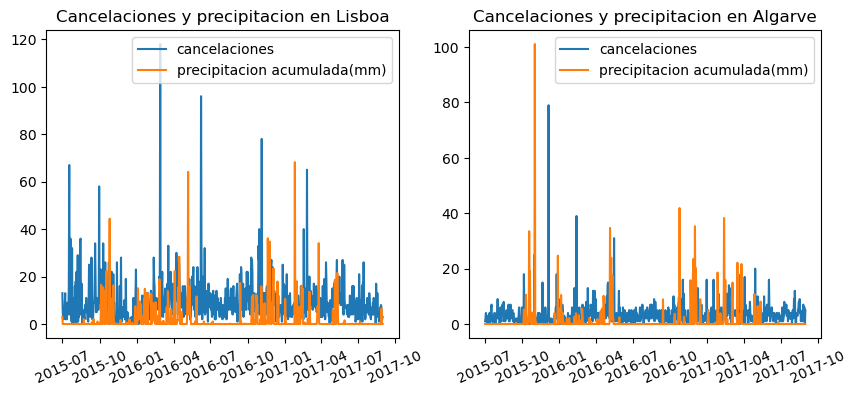

In [148]:
cancels1 = poca_antelacion_meteo[poca_antelacion_meteo['hotel']=='City Hotel'].groupby('arrival_date')['is_canceled'].sum()
cancels2 = poca_antelacion_meteo[poca_antelacion_meteo['hotel']=='Resort Hotel'].groupby('arrival_date')['is_canceled'].sum()
precip1 = poca_antelacion_meteo[poca_antelacion_meteo['hotel']=='City Hotel'].groupby('arrival_date')['precip'].mean()
precip2 = poca_antelacion_meteo[poca_antelacion_meteo['hotel']=='Resort Hotel'].groupby('arrival_date')['precip'].mean()
fig, ax = plt.subplots(1,2, figsize= (10,4))
ax[0].set_title("Cancelaciones y precipitacion en Lisboa")
ax[0].plot(cancels1, label="cancelaciones")
ax[0].plot(precip1, label = "precipitacion acumulada(mm)")
ax[0].tick_params(axis='x', rotation=25)
ax[0].legend()
ax[1].set_title("Cancelaciones y precipitacion en Algarve")
ax[1].plot(cancels2, label="cancelaciones")
ax[1].plot(precip2, label = "precipitacion acumulada(mm)")
ax[1].legend()
ax[1].tick_params(axis='x', rotation=25)
plt.show()

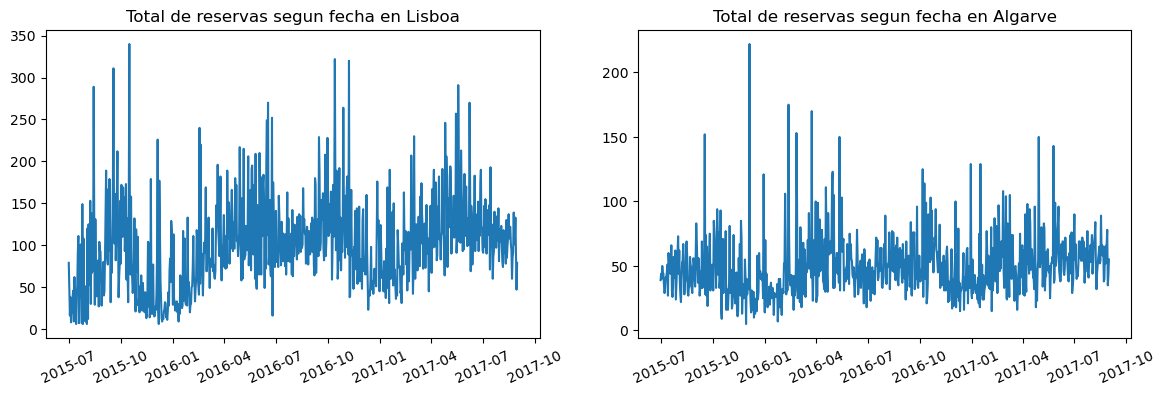

In [139]:
reservas1 = reservas[reservas['hotel']=='City Hotel'].groupby('arrival_date')['arrival_date'].count()
reservas2 = reservas[reservas['hotel']=='Resort Hotel'].groupby('arrival_date')['arrival_date'].count()
fig, ax = plt.subplots(1,2, figsize=(14,4))
ax[0].set_title("Total de reservas segun fecha en Lisboa")
ax[0].tick_params(axis='x', rotation=25)
ax[0].plot(reservas1)
ax[1].set_title("Total de reservas segun fecha en Algarve")
ax[1].tick_params(axis='x', rotation=25)
ax[1].plot(reservas2)

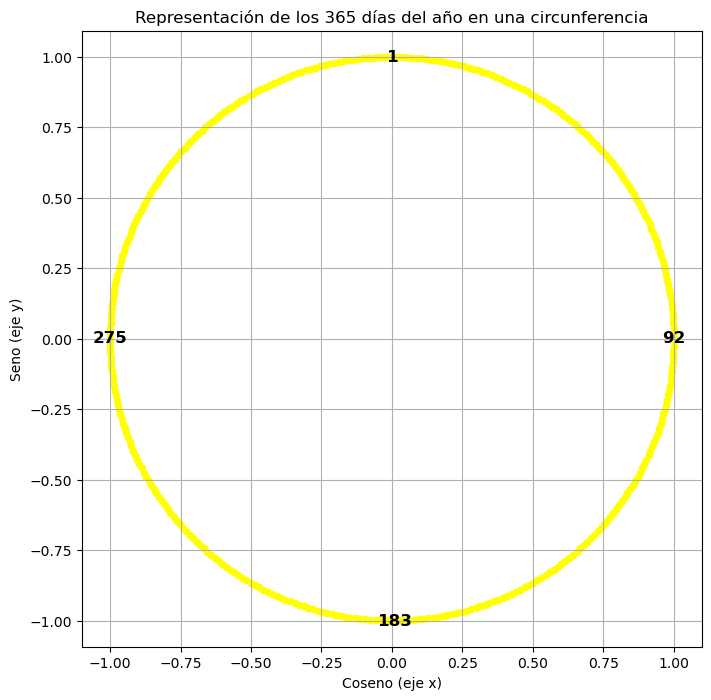

In [120]:
# Definimos los días del año en una circunferencia a través de ángulos
num_dias = 365
angulos = np.linspace(2*np.pi, 0, num_dias, endpoint=False) 

x = np.cos(angulos)
y = np.sin(angulos)

# Desfasamos 90º ambas variables para que el día 1 de enero empiece en el +1 del eje y
angulo_inicial = np.pi/2
x_rotado = np.cos(angulos + angulo_inicial)
y_rotado = np.sin(angulos + angulo_inicial)

# Graficamos destacando los días 1 de enero, 1 de abril, 1 de julio y 1 de octubre, que coinciden con los cruces
# de la circunferencia con los ejes
plt.figure(figsize=(8, 8))
plt.scatter(x_rotado, y_rotado, s=20, c='yellow')

fechas_destacadas = [0, 91, 182, 274]
for i in fechas_destacadas:
    plt.text(x_rotado[i], y_rotado[i], str(i+1), fontsize=12, fontweight='bold', ha='center', va='center', rotation=0)

plt.title('Representación de los 365 días del año en una circunferencia')
plt.xlabel('Coseno (eje x)')
plt.ylabel('Seno (eje y)')
plt.grid(True)
plt.axis('equal')
plt.show()